In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Historical Trade Tweets/NigelBradham_Trans_1.csv"
csv_path2 = "../Player Historical Trade Tweets/NigelBradham_Trans_2.csv"
csv_path3 = "../Player Historical Trade Tweets/NigelBradham_Trans_3.csv"

#Establish pd dataframe for each file
nigelbradham1 = pd.read_csv(csv_path1, sep=";", error_bad_lines=False)
nigelbradham2 = pd.read_csv(csv_path2, sep=";")
nigelbradham3 = pd.read_csv(csv_path3, sep=";")


#concatenate data frames 
nigelbradham_master = pd.concat([nigelbradham1, nigelbradham2, nigelbradham3])
nigelbradham_master

b'Skipping line 250: expected 10 fields, saw 11\nSkipping line 258: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2018-03-19 20:42,0,0,I think I shed a tear when the news of your ex...,NaN,NaN,NaN,9.759104e+17,https://twitter.com/PatrickLeipzig2/status/975...
1,NaN,2018-03-19 20:11,0,0,Tackling machine is going to be here for a whi...,NaN,NaN,NaN,9.759025e+17,https://twitter.com/mahl1334/status/9759025491...
2,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...
3,NaN,2018-03-19 20:08,0,0,So Glad u stayed. Let's get another ring. # Fl...,NaN,NaN,#,9.759018e+17,https://twitter.com/MAnzio77/status/9759018264...
4,NaN,2018-03-19 20:03,0,0,Look forward to seeing you play next season,NaN,NaN,NaN,9.759006e+17,https://twitter.com/bmbsqd4/status/97590060094...
5,NaN,2018-03-19 19:52,0,3,I love Nigel Bradham! https://twitter.com/Nige...,NaN,NaN,NaN,9.758978e+17,https://twitter.com/Kathyinthe850/status/97589...
6,NaN,2018-03-19 19:00,0,0,So stoked your back bro!!! Can’t wait til Sept...,NaN,NaN,#,9.758847e+17,https://twitter.com/jmargophoto/status/9758847...
7,NaN,2018-03-19 18:55,0,0,Big year for you this season I can feel it,NaN,NaN,NaN,9.758834e+17,https://twitter.com/nancyarobinson1/status/975...
8,NaN,2018-03-19 18:43,0,0,NaN,NaN,NaN,NaN,9.758804e+17,https://twitter.com/ThisisWill__/status/975880...
9,NaN,2018-03-19 18:31,0,0,My guy # flyeaglesfly,NaN,NaN,#,9.758774e+17,https://twitter.com/glockboyzrah/status/975877...


In [2]:
#fillna's with text to fix error
nigelbradham_master["text"].fillna("text", inplace=True)
nigelbradham_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2018-03-19 20:42,0,0,I think I shed a tear when the news of your ex...,NaN,NaN,NaN,9.759104e+17,https://twitter.com/PatrickLeipzig2/status/975...
1,NaN,2018-03-19 20:11,0,0,Tackling machine is going to be here for a whi...,NaN,NaN,NaN,9.759025e+17,https://twitter.com/mahl1334/status/9759025491...
2,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...
3,NaN,2018-03-19 20:08,0,0,So Glad u stayed. Let's get another ring. # Fl...,NaN,NaN,#,9.759018e+17,https://twitter.com/MAnzio77/status/9759018264...
4,NaN,2018-03-19 20:03,0,0,Look forward to seeing you play next season,NaN,NaN,NaN,9.759006e+17,https://twitter.com/bmbsqd4/status/97590060094...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

nigelbradham_sent = []

tweets = nigelbradham_master["text"]

for index,tweet in nigelbradham_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    nigelbradham_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
nigelbradham_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2018-03-19 20:42'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2018-03-19 20:11'},
 {'Compound': -0.128,
  'Negative': 0.552,
  'Neutral': 0.241,
  'Positive': 0.207,
  'date': '2018-03-19 20:08'},
 {'Compound': 0.5095,
  'Negative': 0.68,
  'Neutral': 0.0,
  'Positive': 0.32,
  'date': '2018-03-19 20:08'},
 {'Compound': 0.34,
  'Negative': 0.745,
  'Neutral': 0.0,
  'Positive': 0.255,
  'date': '2018-03-19 20:03'},
 {'Compound': 0.6696,
  'Negative': 0.4,
  'Neutral': 0.0,
  'Positive': 0.6,
  'date': '2018-03-19 19:52'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2018-03-19 19:00'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2018-03-19 18:55'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2018-03-19 18:43'},
 {'Compound': 0.0,
  'Ne

In [4]:
# Convert player sentiments to DataFrame
NB_pd = pd.DataFrame.from_dict(nigelbradham_sent)
NB_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2018-03-19 20:42
1,0.0000,1.000,0.000,0.000,2018-03-19 20:11
2,-0.1280,0.552,0.241,0.207,2018-03-19 20:08
3,0.5095,0.680,0.000,0.320,2018-03-19 20:08
4,0.3400,0.745,0.000,0.255,2018-03-19 20:03


In [6]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(nigelbradham_master, NB_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2018-03-19 20:42,0,0,I think I shed a tear when the news of your ex...,NaN,NaN,NaN,9.759104e+17,https://twitter.com/PatrickLeipzig2/status/975...,0.0000,1.000,0.000,0.000
1,NaN,2018-03-19 20:11,0,0,Tackling machine is going to be here for a whi...,NaN,NaN,NaN,9.759025e+17,https://twitter.com/mahl1334/status/9759025491...,0.0000,1.000,0.000,0.000
2,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...,-0.1280,0.552,0.241,0.207
3,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...,0.5095,0.680,0.000,0.320
4,NaN,2018-03-19 20:08,0,0,So Glad u stayed. Let's get another ring. # Fl...,NaN,NaN,#,9.759018e+17,https://twitter.com/MAnzio77/status/9759018264...,-0.1280,0.552,0.241,0.207


In [7]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2018-03-19 20:42,0,0,I think I shed a tear when the news of your ex...,NaN,NaN,NaN,9.759104e+17,https://twitter.com/PatrickLeipzig2/status/975...,0.0000,1.000,0.000,0.000,2018-03-19
1,NaN,2018-03-19 20:11,0,0,Tackling machine is going to be here for a whi...,NaN,NaN,NaN,9.759025e+17,https://twitter.com/mahl1334/status/9759025491...,0.0000,1.000,0.000,0.000,2018-03-19
2,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...,-0.1280,0.552,0.241,0.207,2018-03-19
3,NaN,2018-03-19 20:08,0,0,Glad your back. Kick me some ass. Fly Eagles Fly.,NaN,NaN,NaN,9.759020e+17,https://twitter.com/ConshyBob8/status/97590198...,0.5095,0.680,0.000,0.320,2018-03-19
4,NaN,2018-03-19 20:08,0,0,So Glad u stayed. Let's get another ring. # Fl...,NaN,NaN,#,9.759018e+17,https://twitter.com/MAnzio77/status/9759018264...,-0.1280,0.552,0.241,0.207,2018-03-19


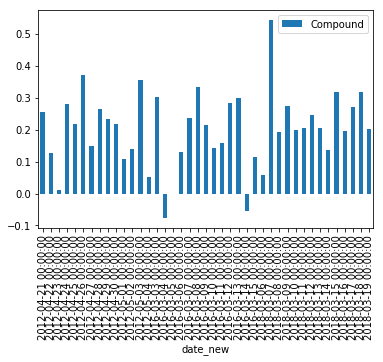

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('nigelbradham.png')
plt.show()
